<a href="https://colab.research.google.com/github/Piyushkumar2004-web/City-Public-Toilet-Usage-Time-Analysis/blob/main/Copy_of_McKay_GAFinalProject_8_9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
maryamalizadeh_worldcities_australia_path = kagglehub.dataset_download('maryamalizadeh/worldcities-australia')
nomilk_data_science_job_listings_australia_20192020_path = kagglehub.dataset_download('nomilk/data-science-job-listings-australia-20192020')
mckparker_galessonbetaset_autoilets_path = kagglehub.dataset_download('mckparker/galessonbetaset-autoilets')

print('Data source import complete.')

100%|██████████| 20.6k/20.6k [00:00<00:00, 10.4MB/s]

Extracting files...


100%|██████████| 9.89M/9.89M [00:00<00:00, 109MB/s]

Extracting files...


100%|██████████| 1.39M/1.39M [00:00<00:00, 82.6MB/s]

Extracting files...
Data source import complete.


<img src="https://assets.sutori.com/user-uploads/image/07de6a4c-94c6-4316-87fa-5a8bc29c2ff3/f003ae9f38c70a029d014dc81d536294.jpeg" width=600 height=600 />

## A Cross-State Analysis of Social Welfare in Australia

*by Parker McKay*
***

We live in the Age of Information.

Every day, we spend surrounded by a sea of data, sifting through it every time we open our phones, laptops, or smart refrigerators. Invisible packets of information are processed and shuttled all around us, powering the ways we interact with and perceive the world.

That's a lot of horsepower, if you know what to do with it. Data scientists have, since the dawn of computing, done their best to harness that knowledge and pare it down into compressed insights. They've propelled forward our understandings of technology, communication, and the modern world - and many of them have set their sights on problems far larger than themselves.

What does it mean for a country to take care of its citizens? Can we measure that? Is there some way we can use that information to help governments and policymakers improve? Questions like these have spawned innumerable metrics attempting to capture a snapshot of social well-being, or to quantify how well-intentioned a government is.

But this research dances around a single, incontrovertible truth.
Let's not beat around the bush.
We all know the way to measure if people are being well taken care of . . .

***The number of public bathrooms.***

<img src="https://www.boredpanda.com/blog/wp-content/uploads/2016/02/amazing-toilet-views-around-the-world-22__880.jpg" width=500 height=500 />

Lands well stocked with public restrooms are happy ones. Exploration is encouraged and uninhibited. People are confident; in themselves, and in the world around them.

By contrast, when efforts to install stalls are stymied, a more anxious mood settles on public spaces. Picnics in the park become uncomfortably constrained, and shopping trips come with a time limit. The few public stalls that do exist are jealously guarded by their few visitors.

A slippery slope to a landscape of secrecy and distrust, this author thinks.
How do today's countries measure up, then? Are the world's needs being adequately met?

***

### The Australian National Public Toilet Dataset


Annually since 2013, the Australian government has kept a diligent log of every public toilet facility in the country. Their data includes the locations of each and every public restroom, whether it's tagged as a men's, women's, or nonbinary facility, and details on the different features a first-time user can expect.

The data is generously provided for free, by the Australian Department of Health.

Will that same generosity extend to Australian citizenry's bathroom access? Let's find out.

First, let's look at the total number of public restrooms in Australia. What are the people working with? We'll also want to understand how that number breaks down across different states, and across different types of bathrooms. Are certain states richer in public toilets than others? And, is there an imbalance in whose needs are being met? Are there more men's facilities than women's, or vice versa? How about nonbinary facilities?

Let's dive into the data and see what's going on!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module to handle file paths

pd.set_option('display.max_columns',60)

# Construct the full path to 'toilets.csv' using the downloaded dataset's root path
# The root path is available in the kernel state as 'mckparker_galessonbetaset_autoilets_path'
toilets_file_path = os.path.join(mckparker_galessonbetaset_autoilets_path, 'toilets.csv')
toilets = pd.read_csv(toilets_file_path)
sns.set(rc={'figure.figsize':(11.7,7)})

**The Total Number of Public Toilets in Australia**
***


In [3]:
print('The total number of public toilets in Australia is:', toilets.shape[0])

The total number of public toilets in Australia is: 22513


It looks like total number of public restrooms in Australia, as of 2022, is 22,513.

That doesn't sound too shabby! It's worth noting also, as we continue through the data, that when the Australian Department of Health began their toilet survey eight years ago, there were only 17,000 public toilets on record. The last decade has seen toilet numbers jump by over 5,000!

**The Number of Public Toilets in Australia, by State**
***

In [4]:
state_toilet_counts = toilets[['State', 'FacilityID']] \
                        .groupby('State') \
                        .count() \
                        .sort_values(by='FacilityID', ascending=False) \
                        .rename(columns={'FacilityID':'Number of Public Bathrooms'})
def mapdict(state):
    mapdict = {'NSW' : 'New South Wales', 'VIC' : 'Victoria', 'QLD' : 'Queensland' \
               , 'WA' : 'Western Australia', 'SA' : 'South Australia', 'TAS' : 'Tasmania'\
               , 'NT' : 'Northern Territory', 'ACT' : 'Australian Capital Territory'}
    try:
        return mapdict[state]
    except KeyError:
        return state

state_toilet_counts.index = state_toilet_counts.index.map(mapdict)
state_toilet_counts

,Number of Public Bathrooms
State,
New South Wales,7258
Victoria,5139
Queensland,4218
Western Australia,2591
South Australia,1883
Tasmania,926
Northern Territory,290
Australian Capital Territory,208


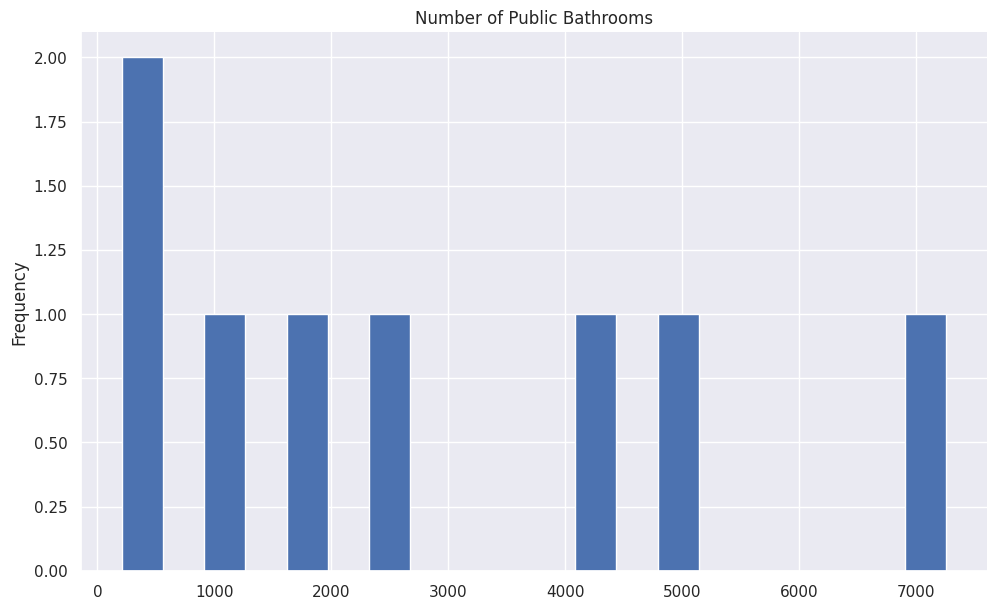

In [5]:
from matplotlib import pyplot as plt
state_toilet_counts['Number of Public Bathrooms'].plot(kind='hist', bins=20, title='Number of Public Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

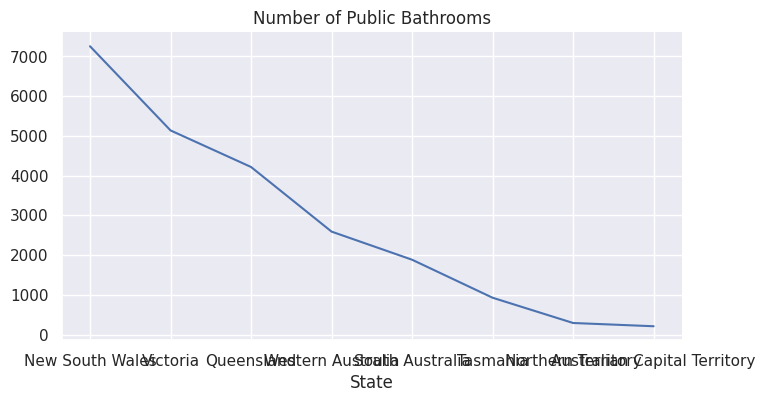

In [6]:
from matplotlib import pyplot as plt
state_toilet_counts['Number of Public Bathrooms'].plot(kind='line', figsize=(8, 4), title='Number of Public Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

When we look at the number of public toilets across the different Australian states, some disparities start to emerge.

Of the total 22,513 public restrooms, over half of them are located in New South Wales and Victoria. Queensland has a notably high number of public bathrooms as well. Collectively, the three states with the lowest numbers - the Australian Capital Territory, the Northern Territory, and Tasmania - have less public bathrooms between them than the state with the next fewest - South Australia. New South Wales has more public bathrooms than any other state, with 7,258. The Australian Capital Territory has the fewest public bathrooms, with only 208.

**Fig. 1: Australia - States and Territories**
***


<img src="http://www.todayifoundout.com/wp-content/uploads/2014/04/australia.jpg" width=400 height=400 />

The different states of Australia. Note that the Australian Capital Territory is labeled Canberra - from here on we will use the city of Canberra to refer to the ACT.

**Fig. 2: The Number of Public Toilets in Australia, by State**
***

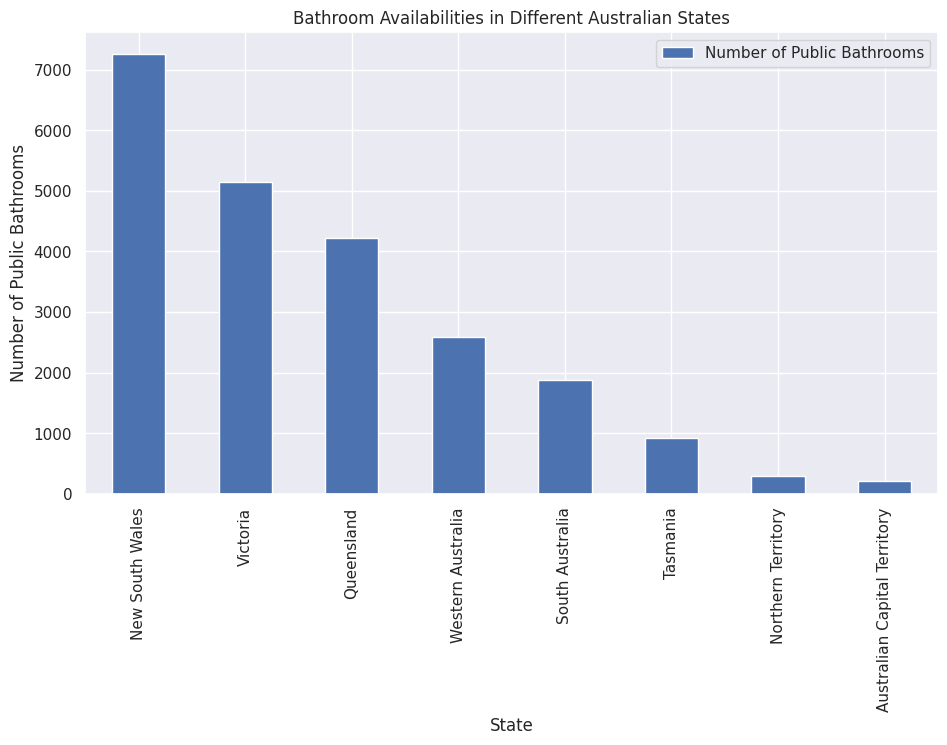

In [7]:
ax = state_toilet_counts.plot(kind='bar', figsize=(11,6))
plt.ylabel('Number of Public Bathrooms')
plt.title('Bathroom Availabilities in Different Australian States');


When we look at the data graphically, the weight of the distribution of public bathrooms towards certain states (New South Wales, Victoria, Queensland) versus others (the Northern Territory, Canberra) is even clearer.

So, maybe we're on to something here! It's obvious that different states have different numbers of public toilets. But that alone isn't enough to determine if people's bathroom-access needs are really being met. Before we jump into trying to understand where those disparities come from, let's take a look at the different types of public bathrooms Australia has to offer, and how common each of them are.

What are the relative amounts of men's, women's, and non-binary facilities? Back to the data!

**The Number of Public Toilets in Australia, by Facility Type**
***

In [8]:
t1 = toilets[ (toilets.Male == True) ]['FacilityID'].count()
t2 = toilets[ (toilets.Female == True) ]['FacilityID'].count()
t3 = toilets[ (toilets.Unisex == True) ]['FacilityID'].count()
t4 = toilets[ (toilets.AllGender == True) ]['FacilityID'].count()

toilets_by_gender = pd.DataFrame([ ['Male',t1], ['Female',t2],
                        ['Unisex',t3], ['All Gender',t4]],
                        columns=['Gender','Number of Public Bathrooms'])

toilets_by_gender.set_index('Gender', inplace=True)
toilets_by_gender

,Number of Public Bathrooms
Gender,
Male,16641
Female,16620
Unisex,4507
All Gender,114


Look at that! There are *very* slightly more (twenty-one) public toilets tagged as "Men's" than tagged as "Women's". Men's public bathrooms are more frequent than any other type of public facility, with 16,641 locations. We can expect many of the men's and women's locations to overlap - bathrooms often come in pairs.

Nonbinary facilities are much rarer - toilets are tagged as either "Men's" or "Women's" almost four times as often as they are tagged "Unisex". Collectively, nonbinary facilities account for 4,621 of Australia's public toilets.

**Fig. 3:  The Number of Public Toilets in Australia, by Facility Type**
***

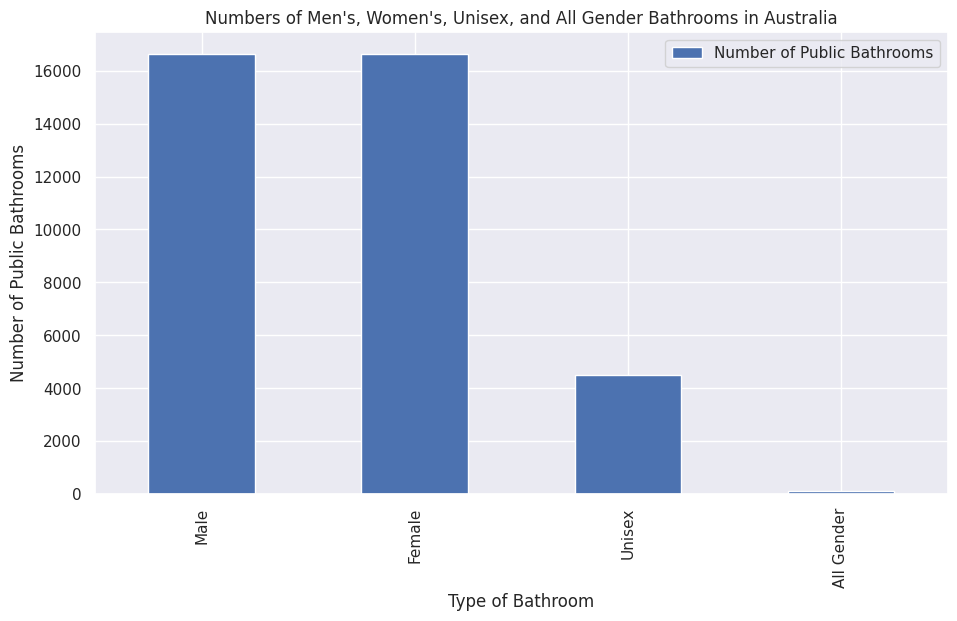

In [9]:
ax = toilets_by_gender.plot(kind='bar', figsize=(11,6))
plt.xlabel('Type of Bathroom')
plt.ylabel('Number of Public Bathrooms')
plt.title("Numbers of Men's, Women's, Unisex, and All Gender Bathrooms in Australia");

The chart tells us the same story. The vast majority of bathrooms are tagged as either men's or women's, and the difference between those two numbers is marginal at best. It's easy to see how few public facilities are tagged with nonbinary indications.

So, what do we know?

We've seen the distribution of public bathrooms across the different states, and how certain states have far more facilities available than others. We've seen how those facilities break down by type: that men's and women's bathrooms are far more common than nonbinary restrooms, and exist *almost* at a 1:1 ratio with one another.

But what do these numbers actually mean without any context? Not much. We need to frame our data alongside demographics in order to understand how public bathroom availability actually stacks up relative to the needs of the population.


***
### Question 1: What are the Relationships Between Public Bathrooms and State Demographics?

How do we determine what the Australian people's needs are?

More data, of course! Different states have different populations - does the number of public bathrooms change accordingly? Or are there certain states that are better at meeting their citizens' bathroom-going needs than others?

What about the types of facilities? Are the right kinds of bathrooms available to the people who need them? Does the ratio of men's and women's bathrooms follow the gender ratio of the population?

In order to answer these questions, we'll need to bring in a new dataset. This new data, provided by SimpleMaps, covers over 1,000 large cities in Australia and includes information on their locations, administrative zones, and populations - everything we need to give our bathroom data its missing context.

In [10]:
demographics_file_path = os.path.join(maryamalizadeh_worldcities_australia_path, 'au.csv')
demographics = pd.read_csv(demographics_file_path)

**Building The Solution Dataset**
***

In [11]:
state_pop = demographics[['admin_name','population']] \
                        .groupby('admin_name') \
                        .sum() \
                        .sort_values(by='population', ascending=False) \
                        .rename(columns={'population': 'Population'}) \
                        .rename_axis('State')

solution_set = state_pop.join(state_toilet_counts)
solution_set

,Population,Number of Public Bathrooms
State,,
New South Wales,7865486,7258
Victoria,6760692,5139
Queensland,5117581,4218
Western Australia,2563704,2591
South Australia,1690659,1883
Tasmania,489634,926
Australian Capital Territory,426704,208
Northern Territory,182207,290


The demographic dataset provides population numbers for each state. Associating those populations with the number of public bathrooms in the different states creates the dataset that will power our solutions.

But, the data is incomplete. While this may be enough to examine how state's numbers of public bathrooms change with their population, we'll need something else in order to answer our questions involving population gender ratios. Specifically, an estimate of the number of male and female members of each state's population. We also need the number of public bathrooms of each type - men's, women's, and nonbinary - for each state.

We'll use a very rough estimate for the states' gender populations. The Australian Department of Health reports that, nationwide, the gender distribution is 50.21% female and 49.79% male. Unfortunately, data was not available on the nonbinary population. Because of this, our analysis moving forward will focus on men's and women's bathrooms, and the male/female gender ratio.

Estimates for state populations of men and women will be constructed by multiplying the total state populations against the national gender ratio. We will also add columns to our dataset that describe the ratio of the number of men's and women's public restrooms in each state, and an estimate of each state's gender ratio. Note that the gender ratio column is a rough normalization of the nationwide ratio by population.

In [12]:
solution_set['Male Population (est.)']    = (solution_set['Population'] * 0.4979).astype('int64')
solution_set['Female Population (est.)']  = (solution_set['Population'] * 0.5021).astype('int64')
solution_set['Gender Ratio (F to M)']     = solution_set['Female Population (est.)'] / \
                                            solution_set['Male Population (est.)']
solution_set['Bathrooms per Capita']      = solution_set['Number of Public Bathrooms'] / \
                                            solution_set['Population']


state_toilet_counts_male = toilets[ (toilets.Male == True) ]
state_toilet_counts_male = state_toilet_counts_male[['State','FacilityID']] \
                            .fillna('X') \
                            .groupby(['State']) \
                            .count()

state_toilet_counts_female = toilets[ (toilets.Female == True) ]
state_toilet_counts_female = state_toilet_counts_female[['State','FacilityID']] \
                            .fillna('X') \
                            .groupby(['State']) \
                            .count()

state_toilet_counts_uni = toilets[ (toilets.Unisex == True) ]
state_toilet_counts_uni = state_toilet_counts_uni[['State','FacilityID']] \
                            .fillna('X') \
                            .groupby(['State']) \
                            .count()

state_toilet_counts_allgen = toilets[ (toilets.AllGender == True) ]
state_toilet_counts_allgen = state_toilet_counts_allgen[['State','FacilityID']] \
                            .fillna('X') \
                            .groupby(['State']) \
                            .count()

state_toilet_counts_male.rename(columns={'FacilityID':'Number of Public Bathrooms - Male'}, inplace=True)
state_toilet_counts_male.index = state_toilet_counts_male.index.map(mapdict)

state_toilet_counts_female.rename(columns={'FacilityID':'Number of Public Bathrooms - Female'}, inplace=True)
state_toilet_counts_female.index = state_toilet_counts_female.index.map(mapdict)

state_toilet_counts_uni.rename(columns={'FacilityID':'Number of Public Bathrooms - Unisex'}, inplace=True)
state_toilet_counts_uni.index = state_toilet_counts_uni.index.map(mapdict)

state_toilet_counts_allgen.rename(columns={'FacilityID':'Number of Public Bathrooms - All Genders'}, inplace=True)
state_toilet_counts_allgen.index = state_toilet_counts_allgen.index.map(mapdict)

solution_set = solution_set.join(state_toilet_counts_male)
solution_set = solution_set.join(state_toilet_counts_female)
solution_set = solution_set.join(state_toilet_counts_uni)
solution_set = solution_set.join(state_toilet_counts_allgen)

solution_set['Bathroom Availability by Gender - Ratio (F to M)'] = \
               solution_set['Number of Public Bathrooms - Female'] / \
               solution_set['Number of Public Bathrooms - Male']

solution_set = solution_set.fillna(0)
solution_set

,Population,Number of Public Bathrooms,Male Population (est.),Female Population (est.),Gender Ratio (F to M),Bathrooms per Capita,Number of Public Bathrooms - Male,Number of Public Bathrooms - Female,Number of Public Bathrooms - Unisex,Number of Public Bathrooms - All Genders,Bathroom Availability by Gender - Ratio (F to M)
State,,,,,,,,,,,
New South Wales,7865486,7258,3916225,3949260,1.008435,0.000923,5622,5623,1279,24.0,1.000178
Victoria,6760692,5139,3366148,3394543,1.008435,0.000760,3675,3664,1249,36.0,0.997007
Queensland,5117581,4218,2548043,2569537,1.008435,0.000824,3159,3154,750,11.0,0.998417
Western Australia,2563704,2591,1276468,1287235,1.008435,0.001011,1963,1959,424,11.0,0.997962
South Australia,1690659,1883,841779,848879,1.008435,0.001114,1276,1274,420,26.0,0.998433
Tasmania,489634,926,243788,245845,1.008438,0.001891,546,546,309,5.0,1.000000
Australian Capital Territory,426704,208,212455,214248,1.008439,0.000487,174,174,31,1.0,1.000000
Northern Territory,182207,290,90720,91486,1.008444,0.001592,226,226,45,0.0,1.000000


That's more like it! Now we're working with the data that we need.

At first glance, what do we see?

**The First Takeaways**
***

***What's the Relationship with State Population?***

The most populous territories are also the ones with the most public restrooms. New South Wales, Victoria, and Queensland - which boast the highest numbers of public toilets - are also the most heavily populated states. As state population grows, the number of public bathrooms trends higher as well. This seems to make sense: more people means more bathrooms. However, the significantly higher populations of those states appears to drive down the number of public bathrooms per capita. New South Wales, despite being more populous than both Victoria and Queensland, has a higher number of public restrooms per capita than those states as well.

What about the least populous states? The pattern holds, except for the two smallest states! Canberra, which has a larger population than the Northern Territory, actually has fewer public restrooms available than the Northern Territory does. Canberra has the lowest ratio of public bathrooms to population across all states. So not only does Canberra have the fewest public bathrooms overall, but also the fewest bathrooms per person. A bit surprising for the capital of a country!

Along with the Northern Territory (because of its low population), the states in the middle of the distribution - both in population and number of public restrooms - have the highest number of public toilets available per capita, with Tasmania having the most.  

***What's the Relationship with the Gender Ratio?***

What about the relative availabilities of men's and women's bathrooms in the different states? We saw from the data how close the numbers of men's and women's bathrooms were, and sure enough, the ratio hovers around 1.0 for each state. However, there is something interesting. The national gender ratio we used to construct our estimates had women as more populous than men. However, there are (marginally) more public bathrooms tagged as "male" than "female".

The states where the ratio of women's to men's bathrooms is less than 1 - Victoria, Queensland, Western Australia, and South Australia - are where these extra men's bathrooms are hiding. Victoria has the greatest disparity between the numbers of men's and women's bathrooms, with 11 more men's bathrooms than women's. New South Wales is the only state where there are more public women's bathrooms than men's.

Overall, although differences do exist in the relative availabilities of men's and women's bathrooms keyed to state gender populations, they do not appear large enough to be significant. Noise in the data could account for these small disparities, which would also explain why New South Wales - where the population is the largest - has a men's to women's bathroom ratio that most clearly mirrors the national gender distribution. The relationship between state population and the number of public restrooms, however, could prove more interesting.

More analysis it is, then!

<img src="https://i.kym-cdn.com/photos/images/newsfeed/000/531/557/a88.jpg" width=400 height=400 />

***Analysis, Charts, and Figures - Australian Public Bathroomo Availability and Demographics***

**Fig. 4: The Number of Public Restrooms by State, Controlled for Population**
***

/tmp/ipython-input-2799146552.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (pops[i]+0.7, b_rooms[i]+0.5) )


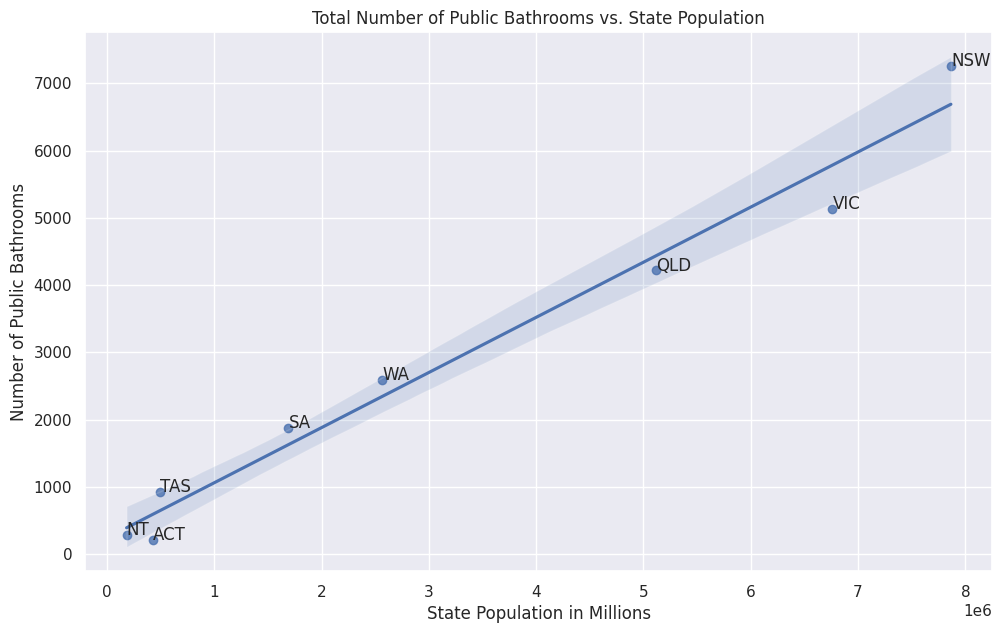

In [13]:
states = solution_set.index
pops = solution_set['Population']
b_rooms = solution_set['Number of Public Bathrooms']

def revmapdict(state):
    mapdict = {'New South Wales' : 'NSW', 'Victoria' : 'VIC', 'Queensland' : 'QLD' \
               , 'Western Australia' : 'WA', 'South Australia' : 'SA', 'Tasmania' : 'TAS'\
               , 'Northern Territory' : 'NT', 'Australian Capital Territory' : 'ACT'}
    try:
        return mapdict[state]
    except KeyError:
        return state

states = states.map(revmapdict)

ax = sns.regplot(x=pops,y=b_rooms, data=solution_set)
for i, state in enumerate (states):
    plt.annotate(state, (pops[i]+0.7, b_rooms[i]+0.5) )
plt.title('Total Number of Public Bathrooms vs. State Population')
plt.xlabel('State Population in Millions');

Graphically representing the relationship between state population and the number of public restrooms confirms our first observations, and shows some previously hidden insights.

There is a strongly positive relationship between population and the number of publicly available bathrooms, that appears largely linear. The states with higher numbers of public bathrooms per capita trend above the model, but fall within its margins of error. These states are relatively richer in public bathrooms than the states below the model's trend line.

Canberra, as expected, is an outlier. It falls outside of the model's margin of error, and we can conclude that there are significantly fewer public restrooms available for citizens in the Australian Capital Territory than is the norm. What is unexpected is that Victoria falls outside of the margin of error as well. Despite having the second highest number of public restrooms overall, when controlling for population the number of public restrooms in Victoria is significantly below the average!

It seems Canberra and Victoria may be less bathroom-goer-friendly than their neighbors! Canberra appears increasingly barren: the fewest public restrooms overall, the fewest public restrooms per capita, and significantly fewer public restrooms relative to population. Yet the citizens of New South Wales, a full third of Australia's people, are well taken care of.


**Fig. 5: The Relative Number of Men's and Women's Bathrooms, by State**
***

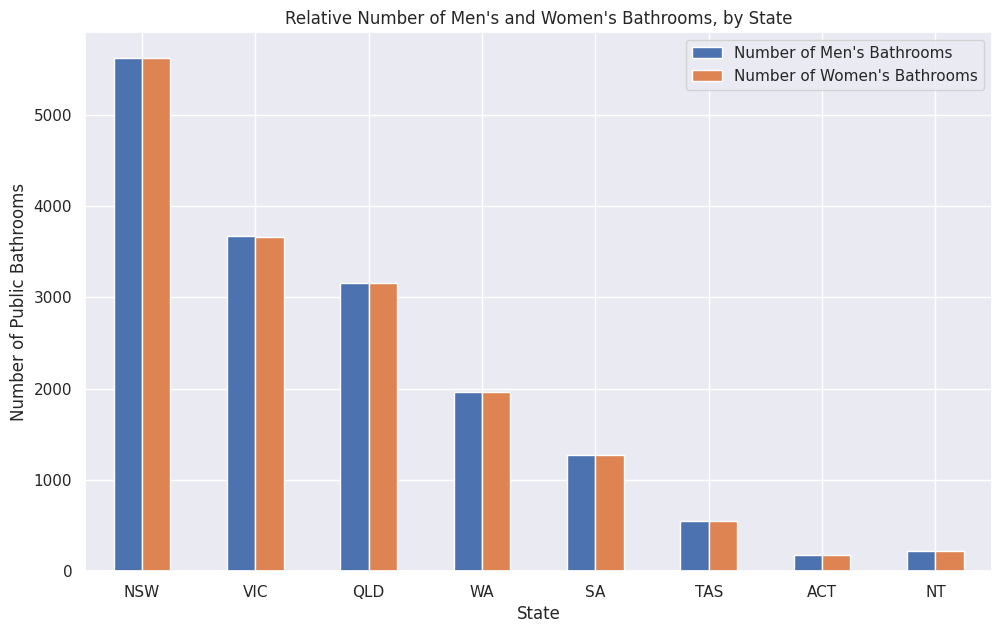

In [14]:
male_brooms = solution_set['Number of Public Bathrooms - Male']
female_brooms = solution_set['Number of Public Bathrooms - Female']

df = pd.DataFrame({'Number of Men\'s Bathrooms' : male_brooms, \
                  'Number of Women\'s Bathrooms' : female_brooms})
df.index = df.index.map(revmapdict)

ax = df.plot.bar(rot=0)
plt.title('Relative Number of Men\'s and Women\'s Bathrooms, by State')
plt.ylabel('Number of Public Bathrooms');

The roughly 1:1 ratio of men's and women's public bathrooms observed in the data is consistent across the different states, as expected from our preliminary observations on the data. As noted, Victoria is the state where men's public facilties outnumber women's by the greatest amount - but the difference is so marginal as to be insignificant.

Although not visible in this chart, recall that New South Wales is the only state where there is a greater number of women's bathrooms than men's - and that the small trends in other states towards men's bathrooms conflicts with Australia's overall gender ratio.

**Fig. 6: The Ratio of Men's and Women's Public Bathrooms Relative to the Population Gender Ratio, by State**
***

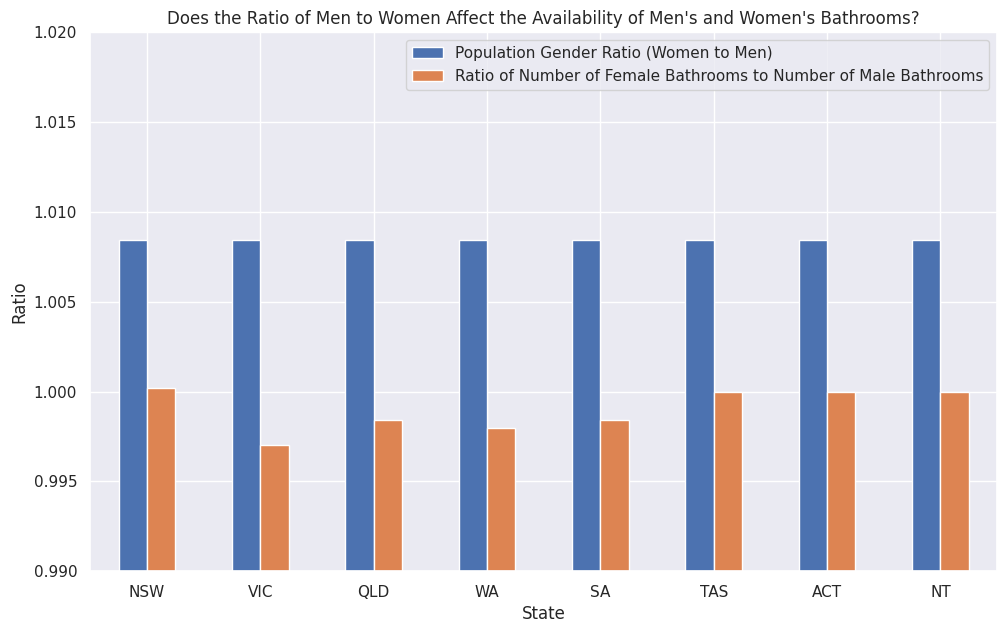

In [15]:
gend_pop = solution_set['Gender Ratio (F to M)']
gend_brooms = solution_set['Bathroom Availability by Gender - Ratio (F to M)']

chart_frame = pd.DataFrame({'Population Gender Ratio (Women to Men)' : gend_pop, \
                            'Ratio of Number of Female Bathrooms to Number of Male Bathrooms' : gend_brooms})
chart_frame.index = chart_frame.index.map(revmapdict)

ax = chart_frame.plot.bar(rot=0);
ax.set_ylim(.99, 1.02)
plt.title('Does the Ratio of Men to Women Affect the Availability of Men\'s and Women\'s Bathrooms?')
plt.ylabel('Ratio');

Because of our generalizations, the estimated population gender ratio is effectively constant across the different states. As observed in the data, the ratio of women's to men's public bathrooms is lowest in Victoria, where there are 11 more men's bathrooms than women's.

However, there is certainly not a large enough difference in the ratio of men's and women's bathrooms and the estimated gender ratio to be significant. The ratio of men's to women's bathrooms hovers around 1:1 for each state - consistent with what we assume about bathroom design.

What's more, that 1:1 ratio is within a reasonable margin of error to approximate the national gender ratio. It appears that Australian men and women's public bathroom have relatively equitable bathroom access, in each state in the country.

In [16]:
jobs_file_path = os.path.join(nomilk_data_science_job_listings_australia_20192020_path, 'listings.csv')
jobs = pd.read_csv(jobs_file_path)

**Completing the Dataset**
***

In [17]:
def quick_dict(state):

    quick_dict = {
        'Northern Territories': 'Northern Territory',
    }

    try:
        return quick_dict[state]
    except KeyError:
        return state

state_jobs = pd.DataFrame({'Number of Data Science Job Openings':jobs.state.value_counts()})
state_jobs.index.names = ['State']
state_jobs.index = state_jobs.index.map(quick_dict)

state_jobs_python = jobs[ (jobs.Python == True)]
state_jobs_python = state_jobs_python[['state', 'Python']] \
        .fillna('X') \
        .groupby(['state']) \
        .count()
state_jobs_python.rename(columns={'Python' : 'Python Job Listings'}, inplace=True)
state_jobs_python.index.names = ['State']

solution_set = solution_set.join(state_jobs)
solution_set = solution_set.join(state_jobs_python).fillna(0)
solution_set

,Population,Number of Public Bathrooms,Male Population (est.),Female Population (est.),Gender Ratio (F to M),Bathrooms per Capita,Number of Public Bathrooms - Male,Number of Public Bathrooms - Female,Number of Public Bathrooms - Unisex,Number of Public Bathrooms - All Genders,Bathroom Availability by Gender - Ratio (F to M),Number of Data Science Job Openings,Python Job Listings
State,,,,,,,,,,,,,
New South Wales,7865486,7258,3916225,3949260,1.008435,0.000923,5622,5623,1279,24.0,1.000178,699,614.0
Victoria,6760692,5139,3366148,3394543,1.008435,0.000760,3675,3664,1249,36.0,0.997007,404,331.0
Queensland,5117581,4218,2548043,2569537,1.008435,0.000824,3159,3154,750,11.0,0.998417,129,110.0
Western Australia,2563704,2591,1276468,1287235,1.008435,0.001011,1963,1959,424,11.0,0.997962,108,102.0
South Australia,1690659,1883,841779,848879,1.008435,0.001114,1276,1274,420,26.0,0.998433,53,45.0
Tasmania,489634,926,243788,245845,1.008438,0.001891,546,546,309,5.0,1.000000,3,3.0
Australian Capital Territory,426704,208,212455,214248,1.008439,0.000487,174,174,31,1.0,1.000000,100,83.0
Northern Territory,182207,290,90720,91486,1.008444,0.001592,226,226,45,0.0,1.000000,1,0.0


Breaking the jobs data down into the total number of data science listings per state and combining with our working data set gives us something useful! Now we have everything we need to move forward with the analysis.

For good measure, we created an extra column counting only the data science jobs where Python was listed as a hiring requirement.

**Initial Observations**
***

So what does the new data tell us? In terms of data science job listings, New South Wales, Victoria, and Queensland again claim the top three spots, with 699, 404, and 110 openings respectively. The number of job openings seems to scale linearly with population for the most part - but again, Canberra is an outlier. However, while Canberra had fewer public toilets than the norm, the inverse is true for data science job listings. Canberra actually has the fifth-most data science job openings at 100 - more than South Australia, a state with four times Canberra's population.

The results for job listings requiring Python follows the same pattern, but with slightly smaller numbers of openings in each state.

So, the relationship between the number of public bathrooms and the number of data science job listings in a given state appear to mirror one another. As population increases, so do the numbers of public restrooms and the number of data science jobs - with Canberra as an outlier in each case, albeit with inverted effects.

But what about the relationship between the number of public toilets and the number of data science job listings. Are there any states where what we see between the number of job openings and bathrooms falls outside of the norm?

While we're at it, why don't we see if looking at only the data science jobs listing Python as a requirement changes the results as well.

***Analysis, Charts, and Figures - Public Bathrooms and Data Science***


**Fig. 7a: The Number of Public Bathrooms Relative to the Number of Data Science Job Listings, by State**

**Fig. 7b: The Number of Public Bathrooms Relative to the Number of Data Science Job Listings Requiring Python Experience, by State**
***

/tmp/ipython-input-2873554945.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (data_jobs[i]+0.7, b_rooms[i]+0.5) )


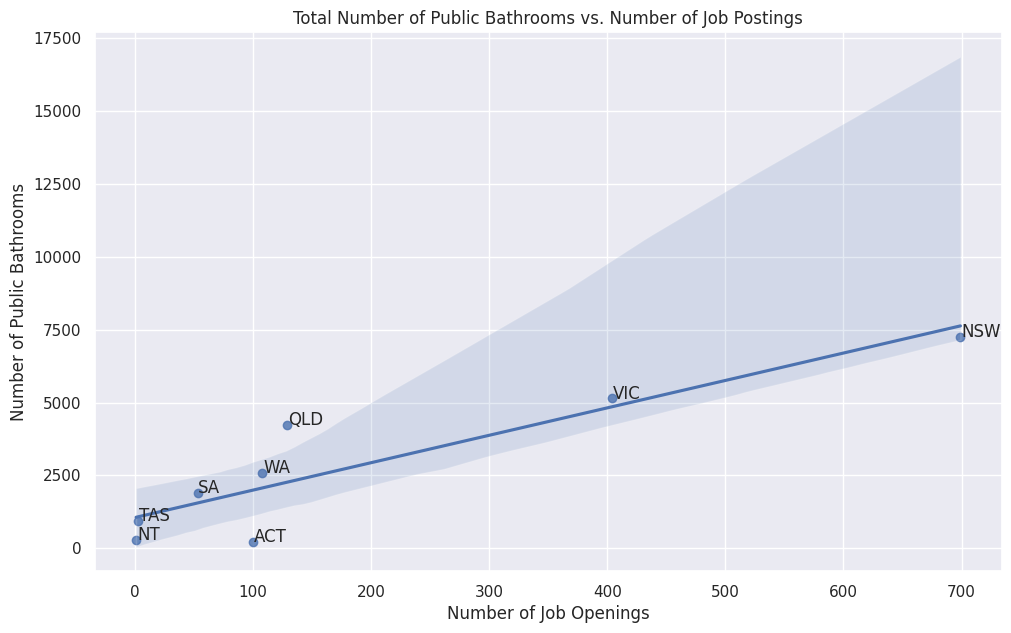

In [18]:
data_jobs = solution_set['Number of Data Science Job Openings']

ax = sns.regplot(x=data_jobs,y=b_rooms, data=solution_set)
for i, state in enumerate (states):
    plt.annotate(state, (data_jobs[i]+0.7, b_rooms[i]+0.5) )
plt.title('Total Number of Public Bathrooms vs. Number of Job Postings')
plt.xlabel('Number of Job Openings');

For the most part, the model predicts a positively linear relationship between the number of public bathrooms and the number of data science jobs per state. We know that the number of public bathrooms has a strong linear correlation with state population and we observed a similar relationship between population and the number of job listings. A positive linear relationship behind public restrooms and data science jobs is consistent if population were a driving force behind each of those numbers.

As observed, Canberra is again an outlier. The low number of public restrooms and comparably high number of data science jobs pushes it out of the model's margin of error. Relative to the number of data science job openings, there are significantly fewer public restrooms than in any other state.

We have another surprise outlier! This time, Queensland also shakes the model's trend line. However, Queensland shift is in the positive direction. Relative to the other states, Queensland has signifcantly more public restrooms compared to the number of open data science jobs. Is that because there are an awful lot of public bathrooms in Queensland, or just because there aren't that many data science jobs?

Remember that Queensland fell within the model's margin of error for the number of public bathroom relative to state population. So what must be happening is that Queensland has fewer data science jobs than we'd expect for a state of its size. We're using those job listings as an estimate for the data science population - so what gives? Why are there so few data scientists?

Come on, Queensland! Step it up!

The results relative to the data science jobs with Python listed as a requirement were effectively identical to the results relative to data science job listings overall.

**Exploring the Relationship**
***

We can observe a positive linear relationship between the estimated number of data scientists and the number of public bathrooms available! But that isn't enough to draw any real conclusions. We've seen that the relationship between the number of public restrooms and state population can be approximated linearly fairly well. We also know from the data that job listings increase with population as well. Is the apparent relationship between data science jobs and number of public bathrooms driven by both of those numbers' relationships to population?

We need to better understand how the number of data science jobs relates to state population. If population is a factor behind both metrics, we expect to see a positive linear relationship between the number of data science jobs and the number of job listings. The graph *should* be more or less an inversion of the results we just obtained, because we are transposing our axes and plotting the number of data science job listings as a function of population, instead of the number of public bathrooms as a function of the number of data science jobs. If population is a strong approximator for the number of bathrooms, we should see roughly the same results as above - but flipped across the axes.

So, we expect states to fall on the other side of the trend line, and our outliers to push the model's margin of error in the opposite direction. If we see something else, it means we've picked up some other relationship between data science jobs and public restrooms!

**Fig. 8a: State Population Relative to the Number of Data Science Job Listings**

**Fig. 8b: State Population Relative to the Number of Data Science Job Listings Requiring Python**
***

/tmp/ipython-input-3928957875.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (pops[i]+0.7, data_jobs[i]+0.5) )


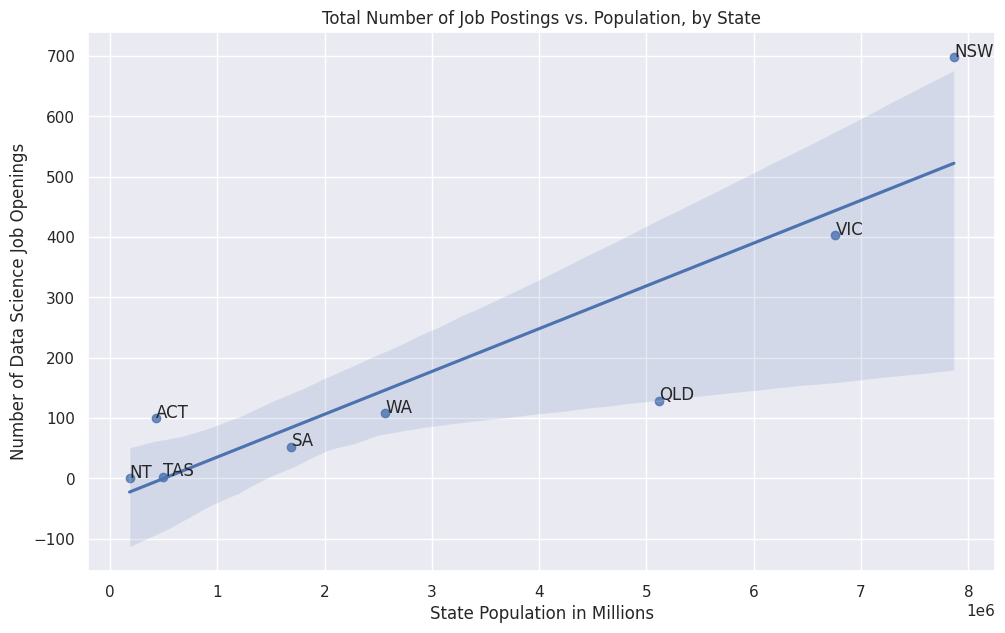

In [19]:
ax = sns.regplot(x=pops,y=data_jobs, data=solution_set)
for i, state in enumerate (states):
    plt.annotate(state, (pops[i]+0.7, data_jobs[i]+0.5) )
plt.title('Total Number of Job Postings vs. Population, by State')
plt.xlabel('State Population in Millions');

And there it is! As predicted, the results are an inversion of what we saw between the number of data science job listings and the number of public toilets. Population does appear to be a driving force behind both numbers. Canberra - as always - is an outlier, although for the first time in the positive direction. Queensland, although an outlier in the previous data, just barely falls within this model's margin of error.

Worth noting is New South Wales (which also had the most public bathrooms overall) actually has significantly more data science job listings relative to its population than the average. What a place to be!

Once again, the results data for the job listings requiring Python follows the same pattern as the results for the general job listing data.

**Data Scientists and Public Bathrooms: What's the Story?**
***

Maybe there isn't as direct a relationship between data scientists and public bathrooms as we had hoped to see (feared?), but that doesn't mean our analysis has to stop there. Population might be a key driver behind the availabilities of both public restrooms and Python and data science opportunities, but we mustn't lose hope!

Although population appears to be an important factor in both quantities, our models only ever returned linear *approximations*. There are still hidden cofactors in play, affecting the data scientist populations *and* the number of public restrooms. What those cofactors are, and if any of them actually *do* affect both quantities is the question we're left with.

Fertile ground for further research, perhaps . . . ?

***
### Looking Towards the Horizon: The Public Toilet Landscape of Tomorrow

Whew. That was a lot of bathroom data. But we walked away kniwing some interesting things. Public restroom availability varies across different Australian states, but in most cases increases approximately linearly alongside population. The ratio of men's and women's bathrooms is effectively 1:1 nationwide, which approximates the national gender ratio as well. Gendered bathrooms are far more common than nonbinary facilities in every state. Population also has a positive, roughly linear relationship with the estimated number of data scientists, appearing to factor behind both metrics.

Of course, the outlier: we know Canberra might be a good state for prospective data scientists, but it might not be the best choice for those who enjoy long walks outside. Instead, consider New South Wales: rich in public bathrooms and opportunities for budding young engineers both.

While it may come as a disappointment that data scientists aren't the ones pulling the strings behind the global public restrooms ecosystem, consolation comes with the knowledge that, in Australia at least, there is no apparent public-bathroom-crisis undermining social harmony.

But just because needs are adequately met, does not mean the world has done enough! Sure, there may be *enough* public restrooms (in some places), but why are they never open? And that's to say nothing of the cleanliness. We deserve more my friends. Heated seats and polished floors. Never stop dreaming.

